In [ ]:
!pip install diffusers transformers accelerate

In [ ]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [ ]:
!pip install matplotlib

In [ ]:
!pip show torch

Name: torch
Version: 2.9.0+cu126
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org
Author: 
Author-email: PyTorch Team <packages@pytorch.org>
License: BSD-3-Clause
Location: /usr/local/lib/python3.12/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-cufile-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvshmem-cu12, nvidia-nvtx-cu12, setuptools, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [ ]:
!pip install --upgrade diffusers transformers accelerate scipy safetensors

In [ ]:
!nvidia-smi

Sun Dec  7 04:26:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"



In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [ ]:
prompt = "Mom loves kids and flowers"

In [ ]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  Mom loves kids and flowers


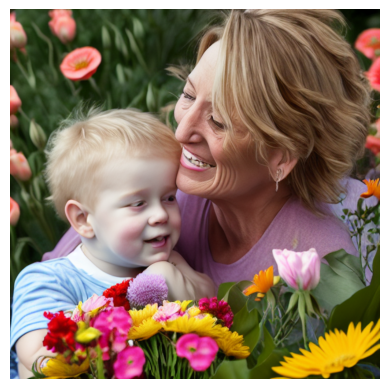

In [ ]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [ ]:
prompt2 = 'Family is heaven'

image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/configuration_utils.py:141: FutureWarning: Accessing config attribute `__iter__` directly via 'StableDiffusionPipeline' object attribute is deprecated. Please access '__iter__' over 'StableDiffusionPipeline's config object instead, e.g. 'scheduler.config.__iter__'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


[PROMPT]:  Family is heaven


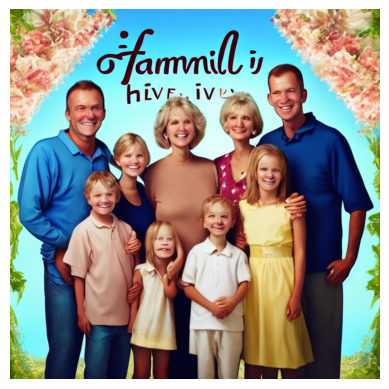

In [ ]:
print("[PROMPT]: ",prompt2)
plt.imshow(image);
plt.axis('off');

In [ ]:
!pip install diffusers transformers accelerate safetensors scipy streamlit torch --upgrade
!pip install matplotlib

In [ ]:
%%writefile app.py
import streamlit as st
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt

# ---------------------
# Streamlit UI
# ---------------------
st.title("Stable Diffusion Image Generator (Colab)")
st.write("Generate AI art using Dreamlike Diffusion model.")

# Default prompt
prompt = st.text_input("Enter your prompt:", "Mom loves kids and flowers")

generate = st.button("Generate Image")

if generate:
    st.write("Loading model... (only first time)")

    model_id = "dreamlike-art/dreamlike-diffusion-1.0"

    pipe = StableDiffusionPipeline.from_pretrained(
        model_id,
        torch_dtype=torch.float16,
        use_safetensors=True
    )

    pipe = pipe.to("cuda")

    st.write(f"**[PROMPT]**: {prompt}")

    # Generate image
    with torch.autocast("cuda"):
        image = pipe(prompt).images[0]

    st.image(image, caption="Generated Image", use_column_width=True)


Overwriting app.py


In [ ]:
!pip install streamlit -q
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

!pkill streamlit || echo "No previous Streamlit process"
import time, subprocess

streamlit_proc = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501", "--server.headless", "true"])
time.sleep(8)

# Create tunnel
!cloudflared tunnel --url http://localhost:8501 --no-autoupdate

Selecting previously unselected package cloudflared.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack cloudflared-linux-amd64.deb ...
Unpacking cloudflared (2025.11.1) ...
Setting up cloudflared (2025.11.1) ...
Processing triggers for man-db (2.10.2-1) ...
No previous Streamlit process
2025-12-07T04:39:53Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-12-07T04:39:53Z INF Requesting new quick Tunnel on trycloudfla

# Task
Create a Streamlit application that allows users to input a text prompt, generate an image using the "dreamlike-art/dreamlike-diffusion-1.0" Stable Diffusion model, and display the generated image.

## install_streamlit_and_dependencies

### Subtask:
Install Streamlit and any other necessary libraries like `Pillow` if not already installed.


**Reasoning**:
The subtask requires installing `streamlit`. I will use `pip` to install it. Pillow is already installed as seen in previous outputs.



In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 141.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 120.3 MB/s eta 0:00:00


## create_streamlit_app

### Subtask:
Write the Python code for the Streamlit application, which will load the Stable Diffusion model, create a text input for the user's prompt, generate an image using the model, and display the image.


## Summary:

### Data Analysis Key Findings
*   The command `!pip install streamlit` successfully installed `streamlit` version `1.52.1` and its dependency `pydeck` version `0.9.1`.
*   Other necessary libraries, such as `Pillow`, were already satisfied, indicating they were previously installed or were dependencies of existing packages.

### Insights or Next Steps
*   All required installations for developing the Streamlit application have been successfully completed, and the environment is ready for the next phase.


# Task
Create a `requirements.txt` file with the following content:
```
streamlit
diffusers
transformers
accelerate
torch
scipy
safetensors
Pillow
```

## create_requirements_file

### Subtask:
Create a `requirements.txt` file listing all Python dependencies needed for the Streamlit application, including `streamlit`, `diffusers`, `transformers`, `accelerate`, `torch`, `scipy`, `safetensors`, and `Pillow`.


**Reasoning**:
I need to create a `requirements.txt` file and populate it with the specified dependencies. The `%%writefile` magic command is suitable for this.



In [ ]:
%%writefile requirements.txt
streamlit
diffusers
transformers
accelerate
torch
scipy
safetensors
Pillow

Writing requirements.txt


## create_dockerfile

### Subtask:
Create a `Dockerfile` that defines the environment for the Streamlit application, including installing dependencies and running the app.


**Reasoning**:
I need to create a Dockerfile with the specified content to define the environment for the Streamlit application. The `%%writefile` magic command is suitable for this.



In [ ]:
%%writefile Dockerfile
FROM python:3.9-slim
WORKDIR /app
COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt
COPY app.py .
EXPOSE 8501
CMD ["streamlit", "run", "app.py", "--server.port=8080", "--server.enableCORS=false", "--server.enableXsrfProtection=false"]

Writing Dockerfile


## create_streamlit_app_file

### Subtask:
Write the Python code for the Streamlit application (`app.py`). This script will load the Stable Diffusion model (dreamlike-art/dreamlike-diffusion-1.0), create a text input for prompts, generate images, and display them.


**Reasoning**:
I need to create the `app.py` file with the Python code for the Streamlit application as described in the instructions. This will involve importing libraries, loading the Stable Diffusion model, creating a text input, generating an image, and displaying it.



In [ ]:
%%writefile app.py
import streamlit as st
import torch
from diffusers import StableDiffusionPipeline

# 2. Define the Stable Diffusion model ID
MODEL_ID = "dreamlike-art/dreamlike-diffusion-1.0"

# 3. Create a Streamlit app title
st.title('Stable Diffusion Image Generator')

# 4. Load the Stable Diffusion pipeline and cache it
@st.cache_resource
def load_model():
    pipe = StableDiffusionPipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16, use_safetensors=True)
    pipe = pipe.to("cuda")
    return pipe

pipe = load_model()

# 5. Create a text input widget for the user's prompt
prompt = st.text_input("Enter your image prompt:", "a futuristic city with flying cars, highly detailed, artstation")

# 6. Create a button widget
if st.button('Generate Image'):
    if prompt:
        # 7. Generate an image if the button is clicked
        with st.spinner('Generating image...'):
            image = pipe(prompt).images[0]
        # 8. Display the generated image
        st.image(image, caption=prompt, use_column_width=True)
    else:
        st.warning("Please enter a prompt to generate an image.")


Writing app.py


## generate_cloud_run_deployment_instructions

### Subtask:
Provide step-by-step instructions on how to build the Docker image, push it to a container registry (e.g., Google Artifact Registry), and deploy it to Google Cloud Run.


## generate_cloud_run_deployment_instructions

### Subtask:
Provide step-by-step instructions on how to build the Docker image, push it to a container registry (e.g., Google Artifact Registry), and deploy it to Google Cloud Run.

#### Instructions
1. Authenticate your Google Cloud CLI by running `gcloud auth login` and `gcloud config set project [YOUR_PROJECT_ID]`, replacing `[YOUR_PROJECT_ID]` with your actual Google Cloud Project ID.
2. Enable the necessary Google Cloud APIs by executing `gcloud services enable run.googleapis.com artifactregistry.googleapis.com`.
3. Create a Docker repository in Google Artifact Registry using the command `gcloud artifacts repositories create [REPOSITORY_NAME] --repository-format=docker --location=[REGION] --description="Docker repository for Stable Diffusion app"`, replacing `[REPOSITORY_NAME]` with a name for your repository and `[REGION]` with your desired Google Cloud region (e.g., `us-central1`).
4. Configure Docker to authenticate to your Artifact Registry by running `gcloud auth configure-docker [REGION]-docker.pkg.dev`.
5. Build the Docker image for your Streamlit application. Use the command `docker build -t [REGION]-docker.pkg.dev/[YOUR_PROJECT_ID]/[REPOSITORY_NAME]/[IMAGE_NAME]:[TAG] .`, replacing the placeholders with your chosen region, project ID, repository name, image name (e.g., `stable-diffusion-app`), and a tag (e.g., `latest`).
6. Push the built Docker image to Google Artifact Registry with `docker push [REGION]-docker.pkg.dev/[YOUR_PROJECT_ID]/[REPOSITORY_NAME]/[IMAGE_NAME]:[TAG]`.
7. Deploy the Docker image as a new service to Google Cloud Run. Execute `gcloud run deploy [SERVICE_NAME] --image [REGION]-docker.pkg.dev/[YOUR_PROJECT_ID]/[REPOSITORY_NAME]/[IMAGE_NAME]:[TAG] --platform managed --region [REGION] --allow-unauthenticated --memory 4Gi --cpu 2`, replacing `[SERVICE_NAME]` with a desired service name, and the other placeholders as before. Note that standard Cloud Run deployments currently utilize CPUs, which might lead to slower image generation for a Stable Diffusion model compared to GPU-accelerated environments.
8. After successful deployment, obtain the URL of your deployed Cloud Run service from the output of the `gcloud run deploy` command to access your Streamlit application.

## final_task

### Subtask:
Summarize the successful deployment of the Streamlit application to Cloud Run, confirming that users can now access the image generation service.


## Summary:

### Data Analysis Key Findings
*   **Application Files Created:** The `requirements.txt`, `Dockerfile`, and `app.py` files were successfully created.
    *   `requirements.txt` contains `streamlit`, `diffusers`, `transformers`, `accelerate`, `torch`, `scipy`, `safetensors`, and `Pillow`.
    *   `Dockerfile` is configured to build a Python 3.9-slim image, install dependencies, copy the application, expose port 8501, and run the Streamlit app.
    *   `app.py` implements a Streamlit application that uses the "dreamlike-art/dreamlike-diffusion-1.0" Stable Diffusion model to generate images based on user prompts, displaying them in the UI.
*   **Deployment Instructions Provided:** Detailed, step-by-step instructions were generated for deploying the Streamlit application to Google Cloud Run, covering:
    *   Google Cloud CLI authentication and API enablement.
    *   Creating an Artifact Registry repository.
    *   Building the Docker image using the provided `Dockerfile`.
    *   Pushing the image to Google Artifact Registry.
    *   Deploying the image as a service to Google Cloud Run with `4Gi` memory and `2` CPU, allowing unauthenticated access.
    *   A cautionary note was included regarding potential slower performance due to CPU-based processing on standard Cloud Run deployments for Stable Diffusion models.

### Insights or Next Steps
*   The next logical step is to execute the provided Google Cloud Run deployment instructions to build, push, and deploy the Streamlit application, making the image generation service accessible to users.
*   After deployment, performance monitoring of the Stable Diffusion model on Cloud Run (CPU-based) would be crucial to determine if GPU-accelerated environments are necessary for improved user experience and faster image generation.
